In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
email_table = pd.read_csv('email_table.csv')
email_table.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [3]:
email_opened = pd.read_csv('email_opened_table.csv')
email_opened.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [4]:
link_table = pd.read_csv('link_clicked_table.csv')
link_table.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [5]:
# check uniqueness of email_id in three tables
print('Unique email number in each dataset')
print('email_table.csv:\t', len(email_table['email_id'].unique()))
print('email_opened_table.csv:\t', len(email_opened['email_id'].unique()))
print('link_clicked_table.csv:\t', len(link_table['email_id'].unique()))

Unique email number in each dataset
email_table.csv:	 100000
email_opened_table.csv:	 10345
link_clicked_table.csv:	 2119


In [6]:
# merge tables together by adding new columns `opened` and `clicked`
email_opened['opened'] = 1
link_table['clicked'] = 1
data = pd.merge(left=email_table, right=email_opened, how='left', on='email_id')
data = pd.merge(left=data, right=link_table, how='left', on='email_id')
data = data.fillna(value=0)
data['opened'] = data['opened'].astype(int)
data['clicked'] = data['clicked'].astype(int)
data.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0


# Opened User proportion and clicked user proportion

In [7]:
print('Opened user proportion:', data['opened'].mean() * 100)
print('Clicked user proportion:', data['clicked'].mean() * 100)

Opened user proportion: 10.345
Clicked user proportion: 2.119


# Inspect text length and click rate

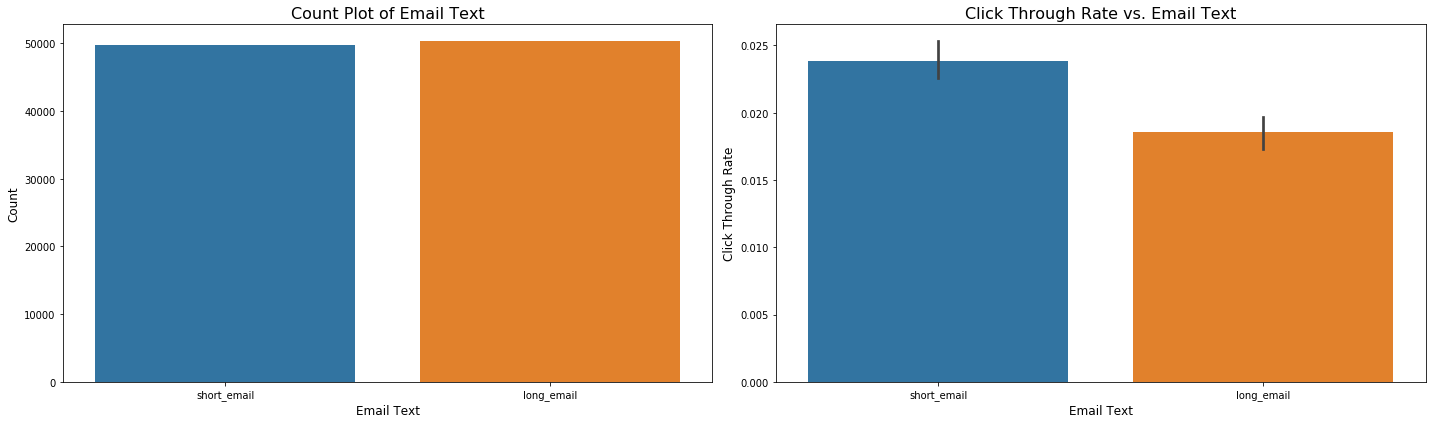

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(x='email_text', data=data, ax=ax[0])
ax[0].set_xlabel('Email Text', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of Email Text', fontsize=16)

sns.barplot(x='email_text', y='clicked', data=data, ax=ax[1])
ax[1].set_xlabel('Email Text', fontsize=12)
ax[1].set_ylabel('Click Through Rate', fontsize=12)
ax[1].set_title('Click Through Rate vs. Email Text', fontsize=16)
plt.tight_layout()
plt.show()

In [9]:
### We can see that short emails were more likely to be clicked than long email

# Inspect email version and open and click rate

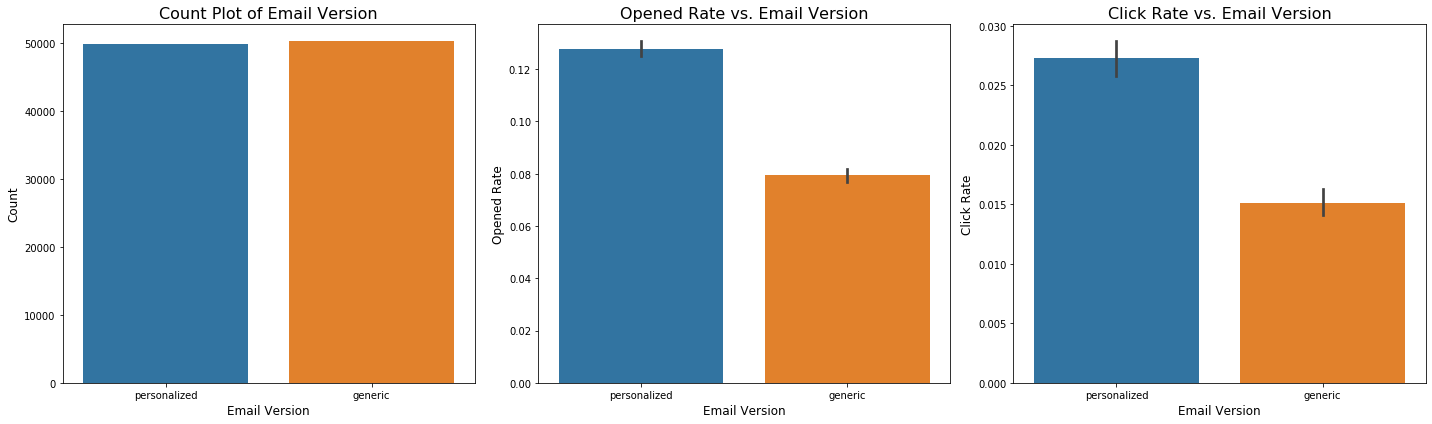

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(x='email_version', data=data, ax=ax[0])
ax[0].set_xlabel('Email Version', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of Email Version', fontsize=16)

sns.barplot(x='email_version', y='opened', data=data, ax=ax[1])
ax[1].set_xlabel('Email Version', fontsize=12)
ax[1].set_ylabel('Opened Rate', fontsize=12)
ax[1].set_title('Opened Rate vs. Email Version', fontsize=16)

sns.barplot(x='email_version', y='clicked', data=data, ax=ax[2])
ax[2].set_xlabel('Email Version', fontsize=12)
ax[2].set_ylabel('Click Rate', fontsize=12)
ax[2].set_title('Click Rate vs. Email Version', fontsize=16)
plt.tight_layout()
plt.show()

In [11]:
### We can see that open rate and click rate for personalized emails were both higher than generic emails

# Time of email sent and its impact on email's open rate and click rate

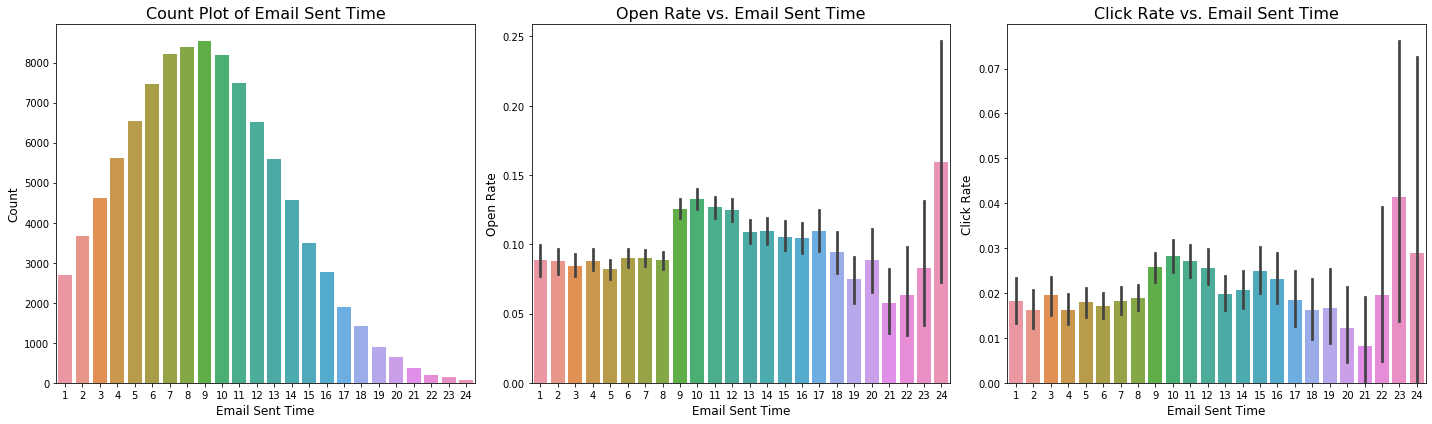

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(x='hour', data=data, ax=ax[0])
ax[0].set_xlabel('Email Sent Time', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of Email Sent Time', fontsize=16)

sns.barplot(x='hour', y='opened', data=data, ax=ax[1])
ax[1].set_xlabel('Email Sent Time', fontsize=12)
ax[1].set_ylabel('Open Rate', fontsize=12)
ax[1].set_title('Open Rate vs. Email Sent Time', fontsize=16)

sns.barplot(x='hour', y='clicked', data=data, ax=ax[2])
ax[2].set_xlabel('Email Sent Time', fontsize=12)
ax[2].set_ylabel('Click Rate', fontsize=12)
ax[2].set_title('Click Rate vs. Email Sent Time', fontsize=16)
plt.tight_layout()
plt.show()

In [13]:
### We can find out that the email open rate and click rate were high from 9 to 16 or after 23.

# Days of email sent and its impact on email's open rate and click rate

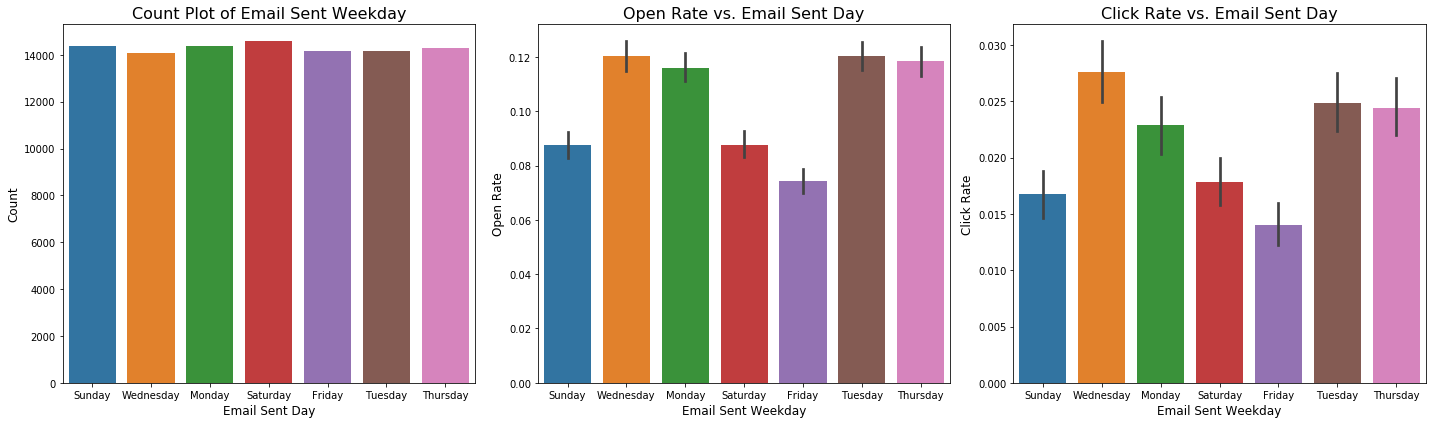

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(x='weekday', data=data, ax=ax[0])
ax[0].set_xlabel('Email Sent Day', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of Email Sent Weekday', fontsize=16)

sns.barplot(x='weekday', y='opened', data=data, ax=ax[1])
ax[1].set_xlabel('Email Sent Weekday', fontsize=12)
ax[1].set_ylabel('Open Rate', fontsize=12)
ax[1].set_title('Open Rate vs. Email Sent Day', fontsize=16)

sns.barplot(x='weekday', y='clicked', data=data, ax=ax[2])
ax[2].set_xlabel('Email Sent Weekday', fontsize=12)
ax[2].set_ylabel('Click Rate', fontsize=12)
ax[2].set_title('Click Rate vs. Email Sent Day', fontsize=16)
plt.tight_layout()
plt.show()

In [15]:
### We can find out that the email open rate and open rate were high on Wed, Mon, Tues and Thur

# User country and email open rate and click rate

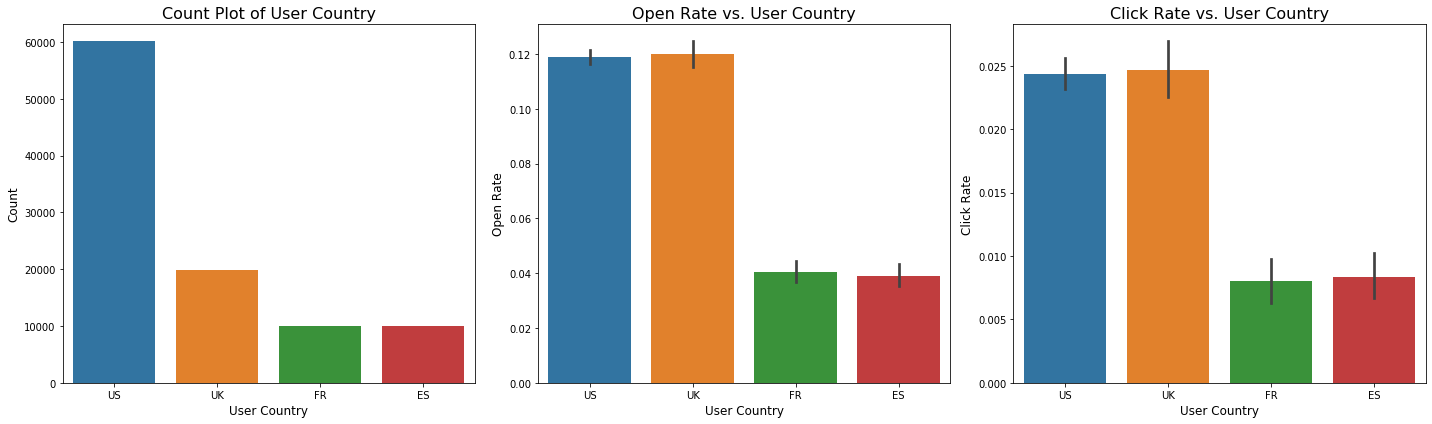

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(x='user_country', data=data, ax=ax[0])
ax[0].set_xlabel('User Country', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of User Country', fontsize=16)

sns.barplot(x='user_country', y='opened', data=data, ax=ax[1])
ax[1].set_xlabel('User Country', fontsize=12)
ax[1].set_ylabel('Open Rate', fontsize=12)
ax[1].set_title('Open Rate vs. User Country', fontsize=16)

sns.barplot(x='user_country', y='clicked', data=data, ax=ax[2])
ax[2].set_xlabel('User Country', fontsize=12)
ax[2].set_ylabel('Click Rate', fontsize=12)
ax[2].set_title('Click Rate vs. User Country', fontsize=16)
plt.tight_layout()
plt.show()

In [17]:
### We can find out that the users from US and UK had higher probability to open and click an email

# User past purchase and its relationship to email open rate and click rate

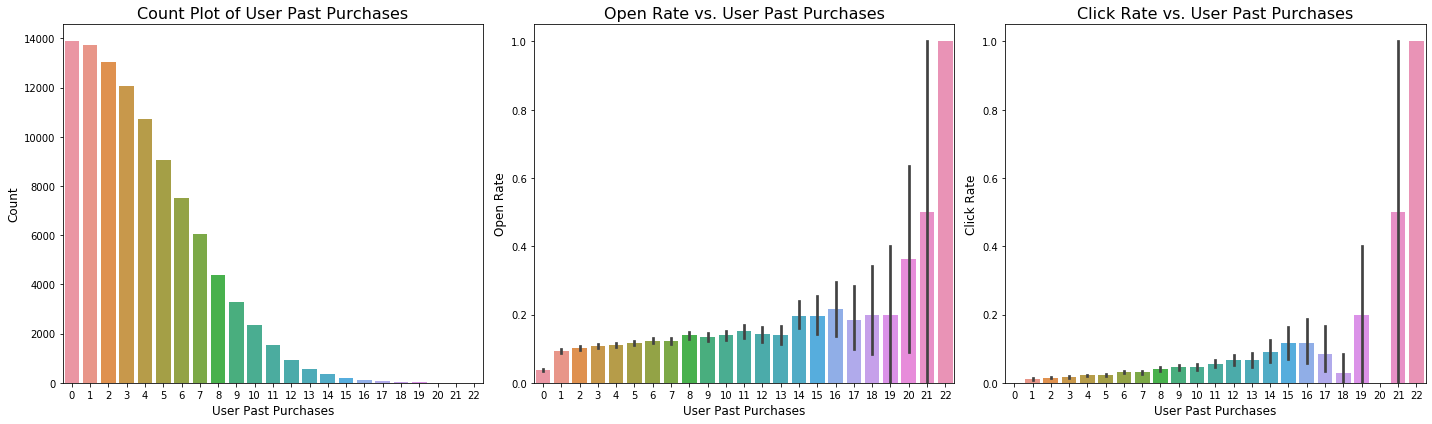

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(x='user_past_purchases', data=data, ax=ax[0])
ax[0].set_xlabel('User Past Purchases', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of User Past Purchases', fontsize=16)

sns.barplot(x='user_past_purchases', y='opened', data=data, ax=ax[1])
ax[1].set_xlabel('User Past Purchases', fontsize=12)
ax[1].set_ylabel('Open Rate', fontsize=12)
ax[1].set_title('Open Rate vs. User Past Purchases', fontsize=16)

sns.barplot(x='user_past_purchases', y='clicked', data=data, ax=ax[2])
ax[2].set_xlabel('User Past Purchases', fontsize=12)
ax[2].set_ylabel('Click Rate', fontsize=12)
ax[2].set_title('Click Rate vs. User Past Purchases', fontsize=16)
plt.tight_layout()
plt.show()

In [19]:
### It's clear to see that user past purchases was positively related to their click rate and open rate

# Build a model to predict users' click

since the data is highly imbalanced (positive examples is only 2% of the total examples), if using default probability threshold (0.5), the model just classify every example as negative, so we need to plot the ROC curve and choose a better probability threshold.

In [20]:
from sklearn.model_selection import train_test_split
import xgboost as xgb


X = data.drop(['clicked', 'opened', 'email_id'], axis=1)
y = data.clicked

In [21]:
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
train_matrix = xgb.DMatrix(X_train,y_train)
test_matrix = xgb.DMatrix(X_test)

/Users/hengyuai/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [23]:
params = {}
params['objective'] = 'binary:logistic'  # output probabilities
params['eval_metric'] = 'auc'
params["num_rounds"] = 300
params["early_stopping_rounds"] = 30
params['max_depth'] = 6
params['eta'] = 0.1
params["subsample"] = 0.8
params["colsample_bytree"] = 0.8

cv_results = xgb.cv(params,train_matrix,
                    num_boost_round = params["num_rounds"],
                    nfold = params.get('nfold',5),
                    metrics = params['eval_metric'],
                    early_stopping_rounds = params["early_stopping_rounds"],
                    verbose_eval = True)

[0]	train-auc:0.682504+0.0165588	test-auc:0.669937+0.00800567
[1]	train-auc:0.701928+0.0114983	test-auc:0.692805+0.00940425
[2]	train-auc:0.713297+0.00709064	test-auc:0.70719+0.0124821
[3]	train-auc:0.716179+0.00543765	test-auc:0.709455+0.0151109
[4]	train-auc:0.718783+0.00576937	test-auc:0.711401+0.0156623
[5]	train-auc:0.723631+0.00476745	test-auc:0.715942+0.0166092
[6]	train-auc:0.726896+0.00366612	test-auc:0.719279+0.0167018
[7]	train-auc:0.728563+0.00342243	test-auc:0.719311+0.0173401
[8]	train-auc:0.731923+0.00291128	test-auc:0.721479+0.0187708
[9]	train-auc:0.733948+0.00393404	test-auc:0.723555+0.0175691
[10]	train-auc:0.736535+0.00311323	test-auc:0.724943+0.0181151
[11]	train-auc:0.739109+0.00297267	test-auc:0.728157+0.0178846
[12]	train-auc:0.742182+0.00446027	test-auc:0.728843+0.017395
[13]	train-auc:0.745364+0.00432414	test-auc:0.729577+0.0197749
[14]	train-auc:0.747956+0.00462877	test-auc:0.730345+0.0196817
[15]	train-auc:0.748701+0.00434747	test-auc:0.730417+0.0192322
[16]

In [42]:
n_best_trees = cv_results.shape[0]
print("best number of trees: {}".format(n_best_trees))

best number of trees: 44


In [24]:
gbt = xgb.train(params, train_matrix, cv_results.shape[0], [(train_matrix, 'train')])

[0]	train-auc:0.68841
[1]	train-auc:0.70763
[2]	train-auc:0.71628
[3]	train-auc:0.722034
[4]	train-auc:0.723351
[5]	train-auc:0.721294
[6]	train-auc:0.723314
[7]	train-auc:0.728066
[8]	train-auc:0.730266
[9]	train-auc:0.730771
[10]	train-auc:0.733821
[11]	train-auc:0.735662
[12]	train-auc:0.741891
[13]	train-auc:0.745285
[14]	train-auc:0.747465
[15]	train-auc:0.748209
[16]	train-auc:0.749508
[17]	train-auc:0.749977
[18]	train-auc:0.751954
[19]	train-auc:0.752025
[20]	train-auc:0.752206
[21]	train-auc:0.75258
[22]	train-auc:0.75275
[23]	train-auc:0.753463
[24]	train-auc:0.753841
[25]	train-auc:0.754018
[26]	train-auc:0.75596
[27]	train-auc:0.756038
[28]	train-auc:0.756266
[29]	train-auc:0.757413
[30]	train-auc:0.759715
[31]	train-auc:0.761011
[32]	train-auc:0.762425
[33]	train-auc:0.763557
[34]	train-auc:0.764329
[35]	train-auc:0.765285
[36]	train-auc:0.76691
[37]	train-auc:0.769558
[38]	train-auc:0.77081
[39]	train-auc:0.771458
[40]	train-auc:0.774149
[41]	train-auc:0.774032
[42]	train

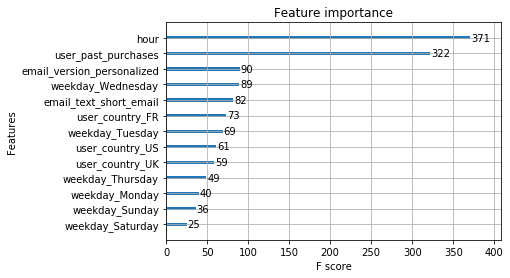

In [25]:
# plot feature importances
xgb.plot_importance(gbt)